In [2]:
# Plotting
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns

# Standard
import copy
import os

# SciPy / NumPy, etc.
import numpy as np
import pandas as pd
import scipy.io

# Set print options
#np.set_printoptions(precision=4, suppress=True, threshold=np.nan)

## Load Data

In [3]:
data = scipy.io.loadmat(os.path.join('ex3', 'ex3data1.mat'))
data_weights = scipy.io.loadmat(os.path.join('ex3', 'ex3weights.mat'))

X = np.array(data['X'])
y = np.array(data['y'])
y.shape = y.shape[0]

print('X data: {}'.format(X.shape))
print('y data: {}'.format(y.shape))
print()
print('X example (the middle 50 digits):\n...{}...'.format(X[0][200:250]))
print()
print('y example:\n{}'.format(y[0]))

X data: (5000, 400)
y data: (5000,)

X example (the middle 50 digits):
...[  0.00000000e+00  -7.03635621e-04  -1.27262443e-02   1.61706648e-01
   7.79865383e-01   1.03676705e+00   8.04490400e-01   1.60586724e-01
  -1.38173339e-02   2.14879493e-03  -2.12622549e-04   2.04248366e-04
  -6.85907627e-03   4.31712963e-04   7.20680947e-01   8.48136063e-01
   1.51383408e-01  -2.28404366e-02   1.98971950e-04   0.00000000e+00
   0.00000000e+00  -9.40410539e-03   3.74520505e-02   6.94389110e-01
   1.02844844e+00   1.01648066e+00   8.80488426e-01   3.92123945e-01
  -1.74122413e-02  -1.20098039e-04   5.55215142e-05  -2.23907271e-03
  -2.76068376e-02   3.68645493e-01   9.36411169e-01   4.59006723e-01
  -4.24701797e-02   1.17356610e-03   1.88929739e-05   0.00000000e+00
   0.00000000e+00  -1.93511951e-02   1.29999794e-01   9.79821705e-01
   9.41862388e-01   7.75147704e-01   8.73632241e-01   2.12778350e-01
  -1.72353349e-02   0.00000000e+00]...

y example:
10


## Helper Functions
### - Plotting -

In [4]:
def plot_number(x):
    """
    Given a list of 400 pixel intensities, reshape the pixels into a 20x20 image
    and plot it in grayscale.
    
    Ex: plot_number(X[0])
    """
    #sns.heatmap(x.reshape(20,20).T, cmap="Greys")
    ax = plt.imshow(X[0].reshape(20,20).T)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)

def plot_random_sample(X):
    """
    Given a list of lists of pixel intensities,
    display a random sample of 100 images.
    
    Ex: plot_random_sample(X)
    """
    fig = plt.figure()

    grid = AxesGrid(fig, 111,
                    nrows_ncols=(10, 10),
                    axes_pad=0.05,
                    share_all=True,
                    )
    
    sampling_indices = np.random.choice(X.shape[0], 100, replace=False)

    for samp, ax in zip(X[sampling_indices, :], grid):
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
        im = ax.imshow(samp.reshape(20,20).T)

### - Logistic Regression -

In [5]:
# Sigmoid / Logistic Function
def g(x):
    return 1 / (1 + np.e ** (-x))

# Logistic Regression Hypothesis Function
def h(X, theta):
    return g(X.dot(theta))

# Logistic Regression Cost Function
def cost(X, y, theta):
    return (-1 / len(X)) * sum(y*np.log(h(X, theta)) + (1-y)*np.log(1-h(X, theta)))

# Theta Update Rule
def update_theta(X, y, theta, alpha):
    return theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y)

# Theta Update Rule With Regularization
def update_theta_with_reg(X, y, theta, alpha, lambda_reg):
    theta_for_reg = copy.deepcopy(theta)
    theta_for_reg[0] = 0
    return theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y) - (lambda_reg / len(X)) * theta_for_reg

## Solutions

Let's start by plotting some examples of the digits we're going to be trying to identify!

We'll plot a 10x10 grid of 100 randomly sampled digit from the 5000 digits we have in our dataset.

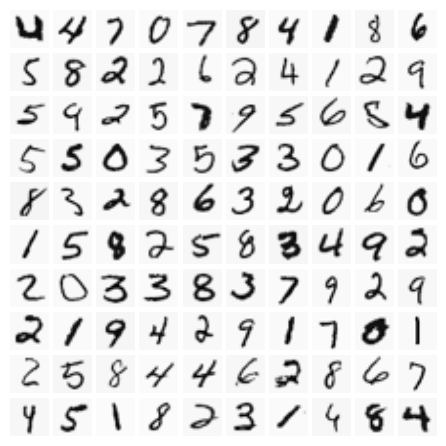

In [6]:
plot_random_sample(X)

### One-vs-All Logistic Regression

We train one classifier for each digit and store all of the parameters in a param dict.

In [8]:
# Set up the param dict to hold all of the parameters for each digit classifier
# We'll save them like params[0] = params_0
params = {}

# Create new variable for features with the additional x_0 feature of all 1's
X_train = np.concatenate((np.ones(X.shape[0])[:, None], X), axis=1)

for num in range(1, 11):
    print('Training for {}...'.format(num))
    
    # Set the desired digit train label to 1, and the rest to 0
    y_train = copy.deepcopy(y)
    y_train[y != num] = 0
    y_train[y == num] = 1
    
    # Set up parameter array for all pixel features
    theta = np.zeros(X_train.shape[1])
    
    # Gradient descent for logistic regression, woohoo!
    for x in range(5000):
        theta = update_theta(X_train, y_train, theta, alpha=0.1)
        
    # Add our parameters to the parameter dict
    params[num] = theta

Training for 1...
Training for 2...
Training for 3...
Training for 4...
Training for 5...
Training for 6...
Training for 7...
Training for 8...
Training for 9...
Training for 10...


In [9]:
print(params)

{1: array([ -5.38382920e-01,   0.00000000e+00,   0.00000000e+00,
         7.94632484e-06,  -7.28798069e-05,  -8.29721298e-05,
        -1.04989733e-04,  -6.69557016e-05,   1.65153651e-03,
        -1.08038411e-04,   1.15970977e-04,   3.15971901e-05,
         1.42534942e-05,   3.66846516e-05,   9.46507639e-05,
         2.20879076e-04,   1.67536535e-04,   1.66476414e-05,
        -1.85748261e-06,  -7.09273309e-08,   0.00000000e+00,
        -1.92421234e-08,   1.51519412e-06,  -1.05568379e-04,
         8.26212293e-04,   9.90882594e-04,   9.59223189e-05,
        -5.39463872e-04,   2.40056018e-04,  -2.76140127e-03,
        -3.19188273e-03,  -4.13512049e-04,   1.41778932e-04,
         4.15403514e-05,  -2.26929219e-04,  -1.50300135e-03,
        -9.87460203e-04,   3.19643636e-04,   2.94455853e-04,
         1.18693050e-04,   4.54027707e-05,   1.59048441e-07,
        -2.03598171e-05,   4.12010501e-05,   1.77680893e-03,
         2.19961989e-03,  -3.78709678e-03,  -4.58124950e-03,
        -9.64150273e

### Experimentation goes here...